# Figure of RTP anomaly and $\Gamma$ map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.vis import mpl

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Auxiliary functions

In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import plot_functions as pf

# Input

In [3]:
with open('model.pickle') as w:
        model = pickle.load(w)

In [4]:
with open('data.pickle') as w:
        data = pickle.load(w)

In [5]:
# importing the pickle file of results
result_path = 'results/multiple-outcrop-3366665/'

with open(result_path+'inversion.pickle') as w:
        inversion = pickle.load(w)

In [6]:
z0 = inversion['z0']
intensity = inversion['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()
n = z0.size
m = intensity.size
N = inversion['x'].size
yp = inversion['y']
xp = inversion['x']
obs = inversion['observed_data']
initial = inversion['results'][9][2][0][0]
solution = [1,2]
truevalues = [0,2]
x0 = -200.
y0 = 0.

In [7]:
# building the matrix of the goal function
gamma_matrix = mfun.goal_matrix(n, m, inversion['results'])

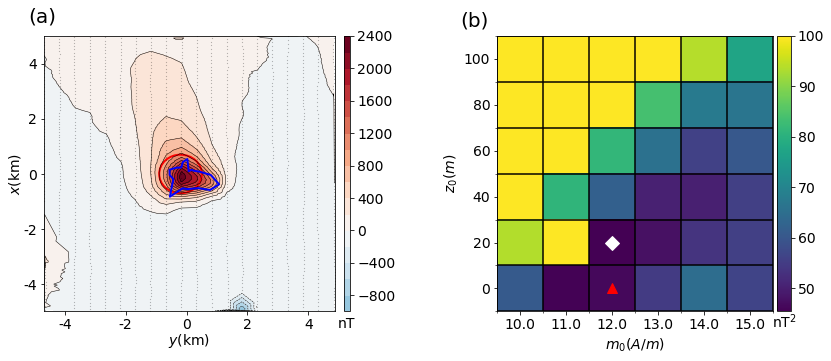

In [8]:
plt.figure(figsize=(12,5))

ax2 = plt.subplot(121)
circle1 = plt.Circle((x0, y0), 700, color='r', linewidth=2., fill=False)
#plt.title('Predicted data['rtp']', fontsize=20)
plt.tricontour(yp, xp, data['rtp'], 20, colors='k', linewidths=0.5)
plt.tricontourf(yp, xp, data['rtp'], 20, cmap='RdBu_r', vmin=-np.max(data['rtp']), vmax=np.max(data['rtp'])).ax.tick_params(labelsize=14)
plt.plot(yp, xp, '.k', markersize=0.2)
plt.xlabel('$y$(km)', fontsize=14, labelpad=0)
plt.ylabel('$x$(km)', fontsize=14, labelpad=0)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=14)
clb.ax.set_title('nT', pad=-292, fontsize=14)
mpl.polygon(model['prisms'][0], '-b', linewidth=2., xy2ne=True)
ax2.add_artist(circle1)
plt.text(np.min(yp)-500, np.max(xp)+500, '(a)', fontsize=20)
mpl.m2km()

ax2 = plt.subplot(1,2,2)
w = 3
img = ax2.imshow(gamma_matrix, vmin=np.min(gamma_matrix),
                vmax=100, origin='lower',extent=[0,w,0,w])
clb = plt.colorbar(img, pad=0.012, shrink=1)
clb.ax.set_title('nT$^2$', pad=-292, fontsize=14)
clb.ax.tick_params(labelsize=14)
img.axes.tick_params(labelsize=14)
plt.ylabel('$z_0 (m)$', fontsize=14)
plt.xlabel('$m_0 (A/m)$', fontsize=14)
ax2.text(-0.4, 3.1, '(b)', fontsize=20)
plt.plot((2.*truevalues[1]+1.)*w/(2.*m), (2.*truevalues[0]+1.)*w/(2.*n), '^r', markersize=10)
plt.plot((2.*solution[1]+1.)*w/(2.*m), (2.*solution[0]+1.)*w/(2.*n), 'Dw', markersize=10)
x_label_list = []
y_label_list = []
for xl, yl in zip(intensity,z0):
    x_label_list.append(str(xl)[:])
    y_label_list.append(str(yl)[:-2])
ax2.set_xticks(np.linspace(w/(2.*n), w - w/(2.*n), n))
ax2.set_yticks(np.linspace(w/(2.*m), w - w/(2.*m), m))
ax2.set_xticklabels(x_label_list)
ax2.set_yticklabels(y_label_list)
# Minor ticks
ax2.set_xticks(np.linspace(0, w, n+1), minor=True)
ax2.set_yticks(np.linspace(0, w, m+1), minor=True)
ax2.grid(which='minor', color='k', linewidth=1.5)

plt.tight_layout(pad = 2.)
plt.savefig('../../manuscript/figures/dipping_rtp.png', dpi=300, bbox_inches='tight')
plt.show()

Dipping model simulation. (a) RTP anomaly of the total-field anomaly
    shown in panel (a). 
	The red circle and the blue polygon represent the horizontal projections of
	the initial approximation $\hat{\mathbf{p}}_{(0)}$ and  the simulated dipping
	source, respectively.
	(b) Discrete map of the goal function $\Gamma(\mathbf{p}, m_0, z_0)$ obtained with
	a $6 \times 6$ grid of tentative values for depth to the top $z_0$ and
	total-magnetization intensity $m_0$.
	The red triangle  and white diamond pinpoint, respectively, the true and
	retrieved values of $m_0$  and $z_0$.Complex model simulation. (a) RTP anomaly of the total-field anomaly
    shown in panel (a). 
	The red circle and the blue polygon represent the horizontal projections of the
	initial approximation $\hat{\mathbf{p}}_{(0)}$ and  the simulated dipping source,
	respectively.
	(b) Discrete map of the goal function $\Gamma(\mathbf{p}, m_0, z_0)$ produced by the estimates $\hat{\mathbf{p}}_{(f)}$ obtained with
	a $6 \times 6$ grid of tentative values for depth to the top $z_0$ and
	total-magnetization intensity $m_0$.
	The red triangle and white diamond pinpoint, respectively, the true and
	retrieved values of $m_0$ and $z_0$.